# Wine Quality Classification using Linear and Logistic Regression

## Step 1: Environment Setup

Make sure you have the required libraries installed, including TensorFlow, Matplotlib, Seaborn, and scikit-learn.

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## Step 2: Download the Dataset

Download the "Wine Quality" dataset from the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv).

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(url, sep=";")

## Step 3: Data Preprocessing

The dataset is loaded and processed:
- The 'quality' column is transformed into a binary classification task where '1' represents high quality (score >= 7) and '0' represents low quality.

In [3]:
# Data preprocessing
data['quality'] = (data['quality'] >= 7).astype(int)

## Step 4: Split the Data

The dataset is split into training and testing sets (80% training, 20% testing) using scikit-learn's `train_test_split` function.

In [4]:
# Split the data into training and testing sets
X = data.drop('quality', axis=1).values
y = data['quality'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 5: Modeling - Linear Regression

A linear regression model is created using TensorFlow. The model aims to predict wine quality scores.

In [ ]:
# Linear Regression Model
model_linear = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(1)
])

model_linear.compile(optimizer='adam', loss='mean_squared_error')
model_linear.fit(X_train, y_train, epochs=100, verbose=0)

## Step 6: Modeling - Logistic Regression

A logistic regression model is created using TensorFlow. This model classifies wines as high quality or not.

In [ ]:
# Logistic Regression Model
model_logistic = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_logistic.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_logistic.fit(X_train, y_train, epochs=100, verbose=0)

## Step 7: Model Evaluation

Both models are evaluated on the test dataset:
- Linear regression is evaluated using mean squared error.
- Logistic regression is evaluated using loss and accuracy metrics.
- Confusion matrices and classification reports are generated for both models.

In [ ]:
# Model Evaluation
linear_loss = model_linear.evaluate(X_test, y_test)
logistic_loss, logistic_accuracy = model_logistic.evaluate(X_test, y_test)

# Predictions
linear_predictions = (model_linear.predict(X_test) >= 0.5).astype(int)
logistic_predictions = (model_logistic.predict(X_test) >= 0.5).astype(int)

## Step 8: Data Visualization

Data is visualized using Matplotlib and Seaborn:
- Quality distribution is displayed.
- Confusion matrices for both models are visualized to show true positives, true negatives, false positives, and false negatives.

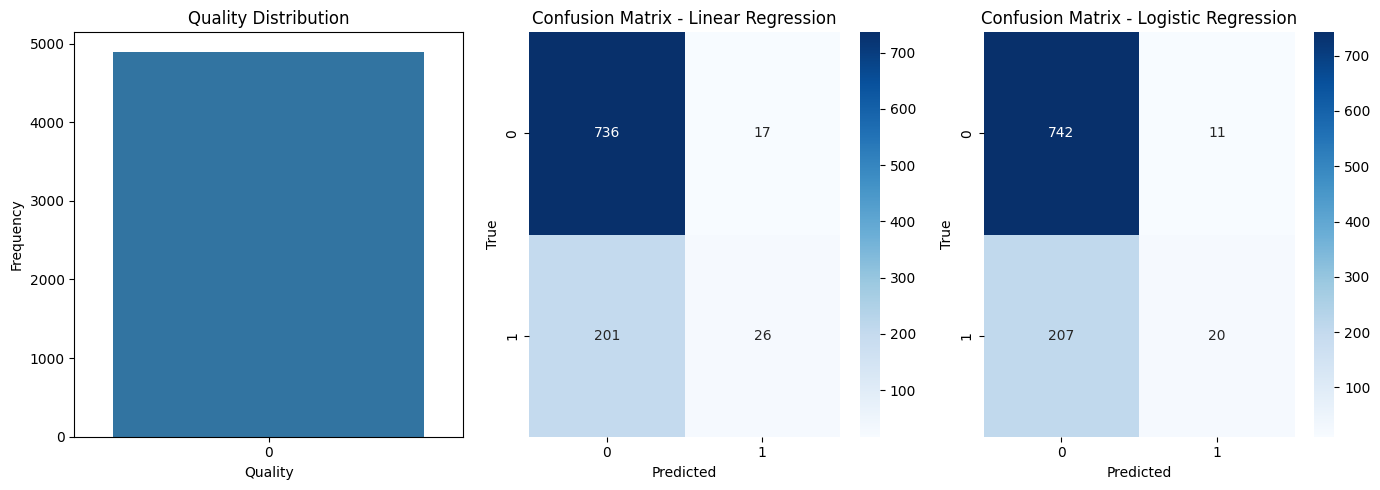

In [12]:
# Data Visualization
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.title("Quality Distribution")
sns.countplot(data['quality'])
plt.xlabel("Quality")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.title("Confusion Matrix - Linear Regression")
sns.heatmap(confusion_matrix(y_test, linear_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 3, 3)
plt.title("Confusion Matrix - Logistic Regression")
sns.heatmap(confusion_matrix(y_test, logistic_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()

## Step 9: Conclusion

Conclusions drawn from the project:
- Logistic regression outperforms linear regression in classifying high-quality wines.
- The confusion matrices and classification reports highlight the differences in model performance.
- The choice of an appropriate model is crucial for the task at hand.

In [ ]:
# Conclusion
print("Linear Model - Mean Squared Error:", linear_loss)
print("Logistic Model - Loss:", logistic_loss)
print("Logistic Model - Accuracy:", logistic_accuracy)

print("\nClassification Report - Linear Regression:")
print(classification_report(y_test, linear_predictions))

print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, logistic_predictions))